In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./dataset/celebA/dear_train.csv')
df.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,170818.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,-1,-1,-1,-1,1,-1,-1,-1,-1
1,014658.jpg,-1,1,1,-1,-1,1,-1,-1,1,...,-1,1,-1,-1,-1,-1,1,-1,-1,1
2,118825.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,-1,-1,1,1,-1,1,-1,1
3,051010.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,1,-1,-1,1
4,036326.jpg,-1,-1,-1,-1,1,-1,1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,1,1


In [3]:
df.columns

Index(['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young'],
      dtype='object')

In [4]:
attr  = 'Male'
label = 'Smiling'

-1    94488
 1    67591
Name: Male, dtype: int64

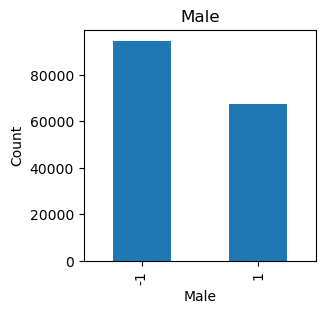

In [5]:
display(df[attr].value_counts())
df[attr].value_counts().plot(kind='bar', figsize=(3,3), xlabel=attr , ylabel='Count', title=attr)
plt.show()

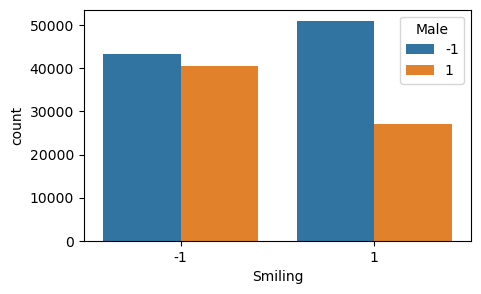

In [6]:
plt.figure(figsize=(5,3))
sns.countplot(data = df, x = label, hue = attr)
plt.show()

In [7]:
df_male = df[df[attr]==1]
df_female = df[df[attr]==-1]

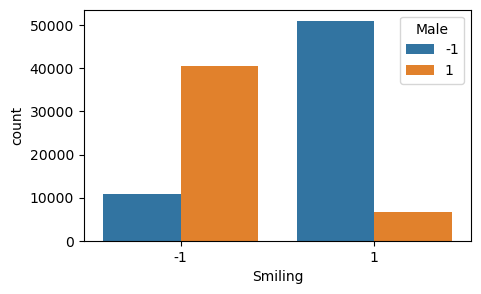

In [8]:
downsample_frac = 0.25

df_male_label = df_male[df_male[label] == 1].sample(frac = downsample_frac)
df_male = pd.concat([df_male_label, df_male[df_male[label] == -1]])

df_female_label = df_female[df_female[label] == -1].sample(frac = downsample_frac)
df_female = pd.concat([df_female_label, df_female[df_female[label] == 1]])

df_downsampled = pd.concat([df_male, df_female]).reset_index(drop=True)

plt.figure(figsize=(5,3))
sns.countplot(data = df_downsampled, x = label, hue =attr)
plt.show()

In [9]:
df_downsampled.to_csv('./dataset/celebA/dear_train_downsample_smile.csv', index=False)

In [10]:
df_downsampled[attr].value_counts()

-1    61922
 1    47315
Name: Male, dtype: int64

In [11]:
print('Total Number of samples: ', len(df_downsampled))

Total Number of samples:  109237
